## Import Data


In [15]:
# from google.colab import drive
# drive.mount('/content/drive')

In [16]:
# === Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage


In [17]:
# === 1. Load & Cleaning ===
data = pd.read_csv("DukuhKupang.csv")
drop_cols = ['Datetime','Timezone','AQI CN','AQI US','HCHO (ppb)','TVOC (ppb)']
data = data.drop(columns=drop_cols).dropna().drop_duplicates()

In [18]:
print(data.isna().sum())
print(data.isnull().sum())
print(data.duplicated().sum())

PM2.5 (ug/m3)               0
PM10 (ug/m3)                0
CO2 (ppm)                   0
Temperature (Celsius)       0
Temperature (Fahrenheit)    0
Humidity (%)                0
dtype: int64
PM2.5 (ug/m3)               0
PM10 (ug/m3)                0
CO2 (ppm)                   0
Temperature (Celsius)       0
Temperature (Fahrenheit)    0
Humidity (%)                0
dtype: int64
0


In [19]:
data = data.dropna()
data = data.drop_duplicates()
data.duplicated().sum()

0

In [20]:
from scipy import stats
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(data))
data_cleaned = data[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [21]:
data_cleaned

,PM2.5 (ug/m3),PM10 (ug/m3),CO2 (ppm),Temperature (Celsius),Temperature (Fahrenheit),Humidity (%)
3,18.0,31,428,39.6,103.3,47
5,23.0,45,433,39.4,102.8,47
6,23.0,49,442,39.2,102.5,48
7,18.0,46,429,39.2,102.6,48
8,20.0,33,428,39.1,102.4,47
...,...,...,...,...,...,...
40038,38.0,72,413,35.1,95.1,56
40039,41.0,91,412,35.1,95.1,57
40040,39.0,84,413,35.1,95.2,57
40041,36.0,66,419,35.4,95.6,57


In [22]:
print("Final shape setelah cleaning:", data_cleaned.shape)

Final shape setelah cleaning: (37486, 6)


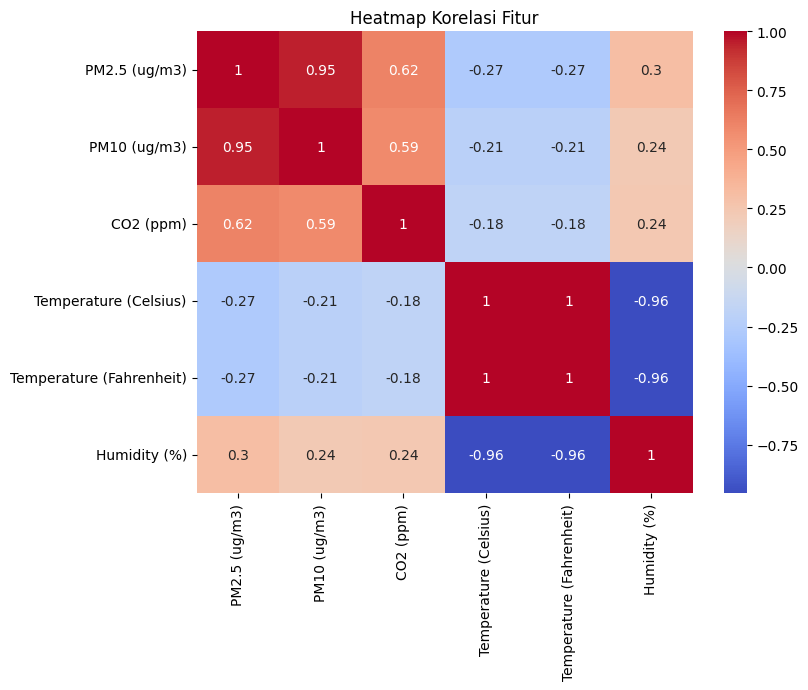

In [23]:
# --- 4. Visualisasi Korelasi ---
plt.figure(figsize=(8,6))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()

# Prepocessing 

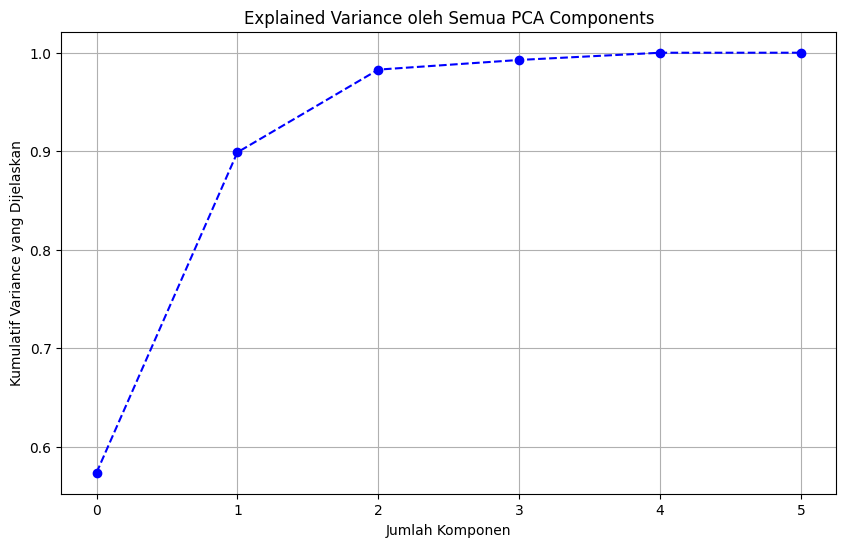

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)

# === PCA untuk semua komponen ===
pca_full = PCA()  # tanpa n_components, supaya semua komponen dihitung
X_train_pca_full = pca_full.fit_transform(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variance yang Dijelaskan')
plt.title('Explained Variance oleh Semua PCA Components')
plt.grid(True)
plt.show()


In [25]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio (3 components):", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())

Explained variance ratio (3 components): [0.5738042  0.32512566 0.08393476]
Total explained variance: 0.9828646182879363


# Clustering

In [26]:
from tqdm import tqdm
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# ==============================
# 3️⃣ AGGLOMERATIVE HIERARCHICAL CLUSTERING
# ==============================
cluster_range = range(2, 11)
silhouette_scores = {}

print("===== AGGLOMERATIVE HIERARCHICAL CLUSTERING =====")
for n_clusters in tqdm(cluster_range, desc="Clustering Progress"):
    ahc = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
    labels = ahc.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores[n_clusters] = score
    print(f"n_clusters={n_clusters}, Silhouette Score={score:.4f}")

# Pilih jumlah cluster optimal berdasarkan Silhouette Score
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f"\n✅ Jumlah cluster optimal AHC berdasarkan Silhouette Score: {optimal_clusters}")


===== AGGLOMERATIVE HIERARCHICAL CLUSTERING =====


Clustering Progress:  11%|█         | 1/9 [00:45<06:04, 45.60s/it]

n_clusters=2, Silhouette Score=0.3926


Clustering Progress:  22%|██▏       | 2/9 [01:20<04:34, 39.24s/it]

n_clusters=3, Silhouette Score=0.3575


Clustering Progress:  33%|███▎      | 3/9 [01:57<03:50, 38.40s/it]

n_clusters=4, Silhouette Score=0.3143


Clustering Progress:  44%|████▍     | 4/9 [02:29<02:59, 35.85s/it]

n_clusters=5, Silhouette Score=0.2998


Clustering Progress:  56%|█████▌    | 5/9 [03:00<02:16, 34.09s/it]

n_clusters=6, Silhouette Score=0.2969


Clustering Progress:  67%|██████▋   | 6/9 [03:34<01:41, 33.97s/it]

n_clusters=7, Silhouette Score=0.2559


Clustering Progress:  78%|███████▊  | 7/9 [04:09<01:08, 34.40s/it]

n_clusters=8, Silhouette Score=0.2502


Clustering Progress:  89%|████████▉ | 8/9 [04:44<00:34, 34.67s/it]

n_clusters=9, Silhouette Score=0.2393


Clustering Progress: 100%|██████████| 9/9 [05:19<00:00, 35.51s/it]

n_clusters=10, Silhouette Score=0.2023

✅ Jumlah cluster optimal AHC berdasarkan Silhouette Score: 2


Silhouette Score = 0.3784, Davies-Bouldin Index = 0.9660


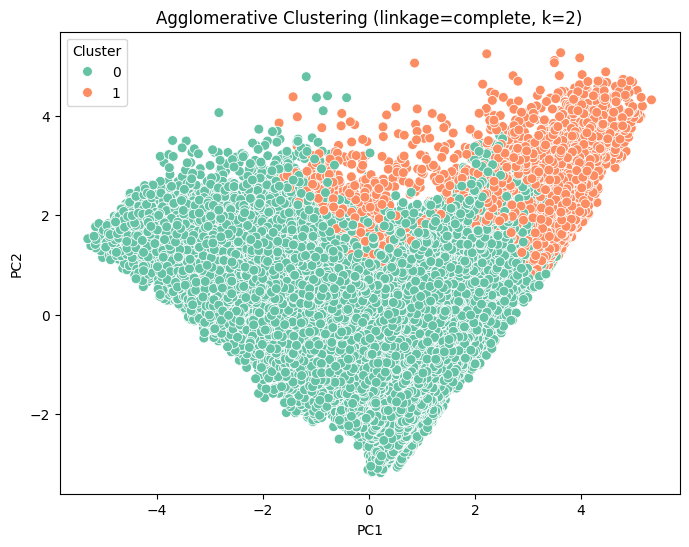

In [32]:

# === Agglomerative Clustering dengan jumlah cluster optimal ===
ahc_optimal = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='complete')
ahc_labels = ahc_optimal.fit_predict(X_scaled)

# Evaluasi cluster
sil = silhouette_score(X_scaled, ahc_labels)
dbi = davies_bouldin_score(X_scaled, ahc_labels)
print(f"Silhouette Score = {sil:.4f}, Davies-Bouldin Index = {dbi:.4f}")


# %%
# === Visualisasi cluster menggunakan PCA 2D ===
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=ahc_labels, palette="Set2", s=50)
plt.title(f"Agglomerative Clustering (linkage=complete, k={optimal_clusters})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()


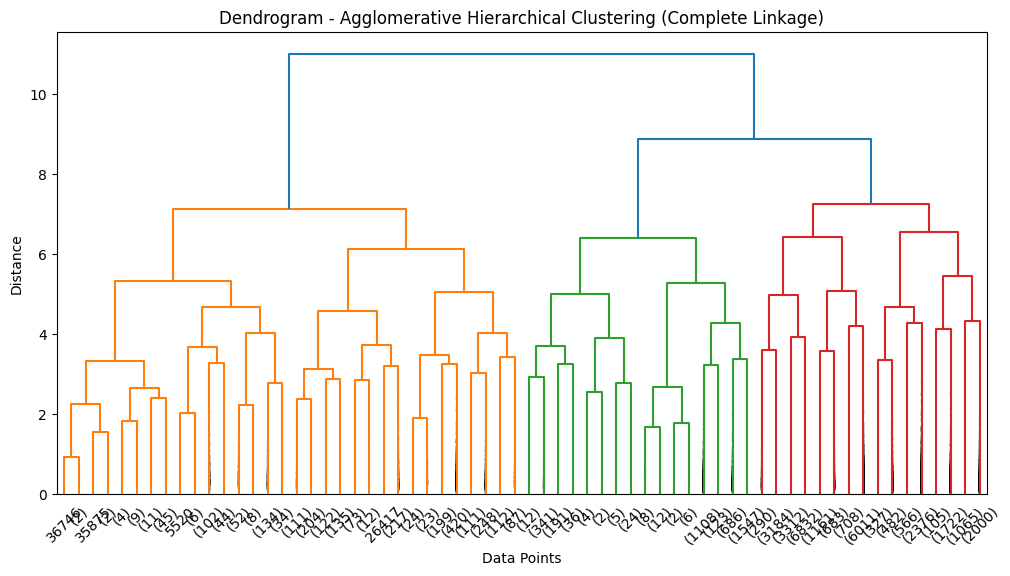

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# === Membuat linkage matrix untuk dendrogram ===
# Gunakan linkage='complete' agar sesuai dengan model yang kamu pakai
Z = linkage(X_scaled, method='complete')

# === Visualisasi dendrogram ===
plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    truncate_mode="level",   # hanya menampilkan level atas
    p=5,                     # tampilkan hanya 5 level
    leaf_rotation=45.,       # rotasi label sumbu X
    leaf_font_size=10.,      # ukuran font label
    show_contracted=True     # memperlihatkan cluster yang digabung
)
plt.title("Dendrogram - Agglomerative Hierarchical Clustering (Complete Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [34]:
# Pastikan X_scaled menjadi DataFrame
X_train_df = pd.DataFrame(X_scaled, columns=data.columns)  # gunakan kolom asli

# Tambahkan hasil clustering
X_train_df['Cluster_AHC'] = ahc_labels

# Buat profil cluster
cluster_profile = X_train_df.groupby('Cluster_AHC').mean()
print("Profil Cluster AHC:")
display(cluster_profile)


Profil Cluster AHC:


,PM2.5 (ug/m3),PM10 (ug/m3),CO2 (ppm),Temperature (Celsius),Temperature (Fahrenheit),Humidity (%)
Cluster_AHC,,,,,,
0,-0.169194,-0.172297,-0.122625,0.028184,0.028164,-0.035312
1,2.313154,2.355581,1.676482,-0.385321,-0.385048,0.482770


In [35]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def compute_metrics(name, labels, X_for_metrics):
    row = {"method": name}
    try:
        row["silhouette"] = silhouette_score(X_for_metrics, labels)
        row["dbi"] = davies_bouldin_score(X_for_metrics, labels)
        row["calinski_harabasz"] = calinski_harabasz_score(X_for_metrics, labels)
    except:
        row["silhouette"], row["dbi"], row["calinski_harabasz"] = np.nan, np.nan, np.nan
    return row

results = []
results.append(compute_metrics("Agglomerative", ahc_labels, X_pca))


df_metrics = pd.DataFrame(results).set_index("method")
print("\n=== Metrics table ===")
print(df_metrics)


=== Metrics table ===
               silhouette       dbi  calinski_harabasz
method                                                
Agglomerative    0.382971  0.945024        8040.008488


AQI_Category   Good  Severe
Cluster_AHC                
0             11617   23314
1              2550       5


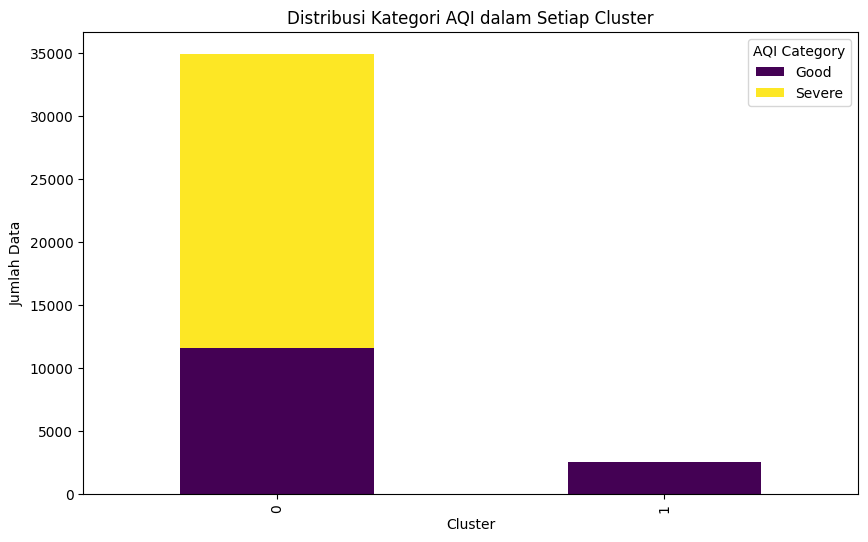

In [36]:
# === 10. Fungsi AQI ===
breakpoints = {
    "PM2.5": [(0, 30, 0, 50),
              (31, 60, 51, 100),
              (61, 90, 101, 200),
              (91, 120, 201, 300),
              (121, 250, 301, 400)],
    
    "PM10": [(0, 50, 0, 50),
             (51, 100, 51, 100),
             (101, 250, 101, 200),
             (251, 350, 201, 300),
             (351, 430, 301, 400)],
}

def calculate_sub_index(pollutant, concentration):
    for (Bmin, Bmax, Imin, Imax) in breakpoints[pollutant]:
        if Bmin <= concentration <= Bmax:
            return ((Imax - Imin)/(Bmax - Bmin)) * (concentration - Bmin) + Imin
    return np.nan

def calculate_aqi_linear(row):
    sub_pm25 = calculate_sub_index("PM2.5", row["PM2.5 (ug/m3)"])
    sub_pm10 = calculate_sub_index("PM10", row["PM10 (ug/m3)"])
    return max(sub_pm25, sub_pm10)

def categorize_aqi(value):
    if value <= 50: return "Good"
    elif value <= 100: return "Satisfactory"
    elif value <= 200: return "Moderate"
    elif value <= 300: return "Poor"
    elif value <= 400: return "Very Poor"
    else: return "Severe"

# Tambahkan kolom AQI ke DataFrame asli
X_train_df["AQI_Value"] = X_train_df.apply(calculate_aqi_linear, axis=1)
X_train_df["AQI_Category"] = X_train_df["AQI_Value"].apply(categorize_aqi)

# %%
# === 11. Crosstab Cluster vs AQI Category ===
cluster_summary = pd.crosstab(X_train_df["Cluster_AHC"], X_train_df["AQI_Category"])
print(cluster_summary)

# Plot stacked bar
cluster_summary.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Distribusi Kategori AQI dalam Setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.legend(title="AQI Category")
plt.show()